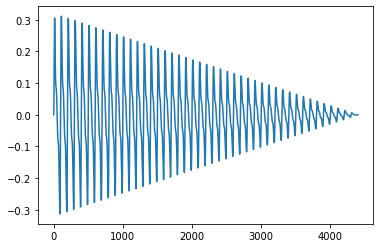

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio
from random import seed
from random import randint

dur = .1; #Cuanto tiempo tengo presionada la tecla
fs = 44100; #Frecuencia de sampleo
freq = 440;
#norm = 440/freq;
norm = 1;


A =0.001 #En un piano, el ataque es inmediato. 0.001 0.218
D =0.2*norm #El descenso lo saqué a ojo tratando de imitar el piano real. 0.2 0.001
R =0.1*norm #El release es muy breve, también. 0.2 0.133

S = 0.32*norm #El sustain es un porcentaje de la amplitud máxima a la que llega en el ataque. Defino arbitrariamente este valor ya que suena bien.0.32 0.1

#maxSustainFlag = False;
max_sustain = 2*norm #Duración máxima del sustain




releaseTime = 0;
envelope = 0;


attackRate = 1/A #La amplitud máxima sobre el tiempo que el toma llegar.
decayRate = (1-S)/D #Misma idea
releaseRate = S/R #Asumo que el tiempo de release normal va a ser cuando el sustain está en su valor máximo S y quiero que baje en R segundos.

if(dur < A + D ): #Si no llego al sustain, entro a este caso.
    if(dur > A): #Si completo el ataque, recorto el decay
        D = dur - A;
        S = 0;
        minDecay = 1 - decayRate * D; #Me fijo hasta donde baja después del ataque hasta el momento que se corta.
        #releaseTime = minDecay/releaseRate #El tiempo de release va a ser el tiempo que tarda en bajar con la pendiente calculada desde minDecay hasta cero.
        attack = np.linspace(0, 1, int(A * fs)); #Creo el envelope.
        decay = np.linspace(1, minDecay, int(D * fs))
        #release = np.linspace(minDecay, 0, int(releaseTime *fs))
        envelope = np.concatenate((attack, decay))#Concateno las rectas de la envolvente.
    else: #Si no, elimino el decay y recorto el ataque directamente.
        D = 0;
        S= 0;
        print("hey arnold")
        A = dur;
        maxAttack = attackRate * dur;
        #releaseTime = (maxAttack)/releaseRate
        attack = np.linspace(0, maxAttack, int(A * fs));
        #release = np.linspace(maxAttack, 0, int(releaseTime *fs))
        envelope = attack #Concateno las rectas de la envolvente.
else:
    sustain_time = dur - A - D; #El sustain time asumiendo que fuese ideal y no decae. Luego elegiré el mínimo entre los dos.
    alpha = S/max_sustain #Fall rate del sustain. Puede ser que llegue a 0 antes del release, cuyo caso se contempla.
    t = np.linspace(0,max_sustain,int(fs*(max_sustain))); # Tiempo total
    Sf = S - t*alpha; #Asumo que desciende linealmente el sustain. Con el dur*alpha el
    index = Sf < S/100
    minIndex = np.argmax(index)
    Sf[index] = 0
    attack = np.linspace(0, 1, int(A * fs));
    decay = np.linspace(1, S, int(D * fs))
    
    if not minIndex or int(sustain_time * fs) <= minIndex:
        sustain = Sf[ : int(sustain_time*fs)]
        releaseTime = Sf[int(sustain_time*fs)]/releaseRate;
        #release = np.linspace(Sf[int(sustain_time*fs)], 0, int(releaseTime * fs));
        envelope = np.concatenate((attack, decay,sustain))#Concateno las rectas de la envolvente.
   
    else:
        sustain = Sf[ : minIndex]; 
        releaseTime = Sf[-1]/releaseRate;
        print(Sf[minIndex])
       # release = np.linspace(Sf[minIndex - 1], 0, int(releaseTime * fs)); 
        envelope = np.concatenate((attack, decay,sustain))#Concateno las rectas de la envolvente.

release = np.zeros(int(dur*fs))

for i in range(len(release)):
    release[-(i+1)] = (i*releaseRate)/fs;

t = np.linspace(0,dur,int(fs*dur)); # Tiempo total
s = np.zeros(int(fs*dur)); #Creo arreglo para la señal que será mi nota de piano.

#x = [-48,-36,-36,-30,-32,-30,-32,-35,-37,-46,-45,-51,-55,-55,-58,-57,-65,-66,-66]
Amp = [1, 0.561,0.355, 0.0631,0.02,0.00631,0.00369]
#Amp = np.zeros(np.size(x));

#for i in range(len(x)):
#    Amp[i] = 10**(x[i]/20)
    
#print(Amp)
    
for i in range(1, len(Amp) + 1):
    s += Amp[i - 1]*np.sin(2*np.pi*(freq)*i*t);
    # + randint(0,1) 

if(s.size > envelope.size):
    envelope = np.append(envelope, np.zeros(s.size - envelope.size))
    
envelope[envelope > release] = release[envelope > release]
    
    
maxs = np.max(s)
final_array = s / maxs * envelope#[(s/((maxs))*envelope) for s,envelope in zip(s,envelope)]
plt.plot(final_array);

   
Audio(final_array, rate = fs)

In [57]:
[dur,A,D,S,R,norm]

[5, 0.218, 0.0001, 1, 0.133, 1]

In [22]:
s.size

47245

In [23]:
fs

88200

In [24]:
fs / 10

8820.0

In [25]:
s.size / fs

0.535657596371882

In [6]:
s.size

88200

In [7]:
envelope.size

88200